In [71]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

sys.path.append("reflutils")
import reflutils as ru
from runfile import *

macro_folder = make_macro_folder()

# Data Processing

In [72]:
# Energy Sorter
# ru.main()  # make asynchronous, waiting function that is ran by scripting

In [84]:
%matplotlib inline
pxr = ru.Refl() # make into loader that works with the macro folder to locate the data as it is sorted

c:\Users\Harlan Heilman\CarbonLab\Refl-Utils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col].iloc[:meanCutoff] = mean[col]
c:\Users\Harlan Heilman\CarbonLab\Refl-Utils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col].iloc[:meanCutoff] = mean[col]
c:\Users\Harlan Heilman\CarbonLab\Refl-Utils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<Axes: xlabel='Q/G'>

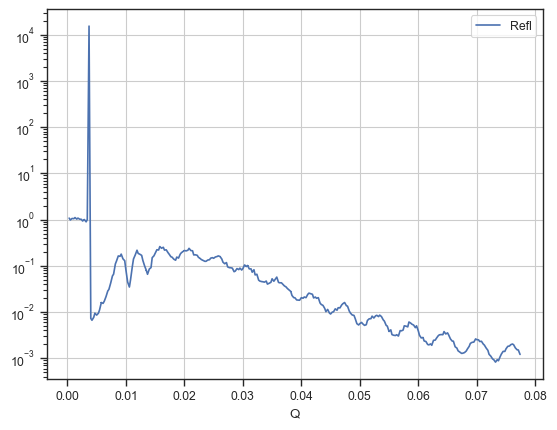

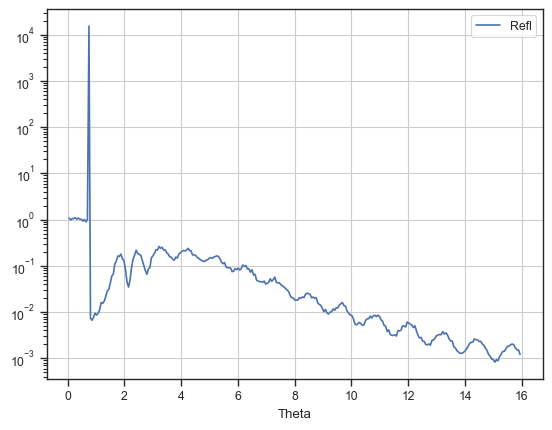

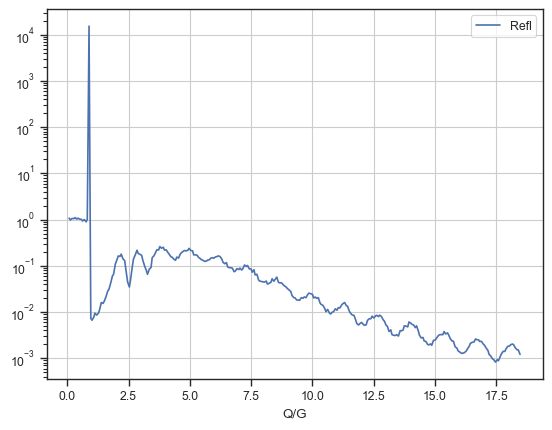

In [85]:
pxr.plot(grid=True)
thickness = 1500
G = 2 * np.pi / thickness
pxr.refl["Q/G"] = pxr.refl["Q"] / G
pxr.refl.plot(x="Theta", y="Refl", logy=True, grid=True)
pxr.refl.plot(x="Q/G", y="Refl", logy=True, grid=True)

<Axes: xlabel='Q'>

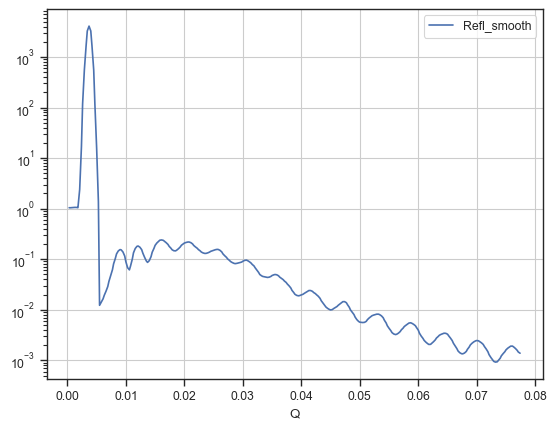

In [86]:
from scipy.ndimage import gaussian_filter1d

pxr.refl["Refl_smooth"] = gaussian_filter1d(pxr.refl["Refl"], sigma=1.5)
pxr.refl.plot(x="Q", y="Refl_smooth", logy=True, grid=True)

In [87]:
import ipywidgets as widgets


@widgets.interact(i=(0, len(pxr.images)))
def show_image(i):
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    ax[0].imshow(pxr.images["Beam"][i], cmap="coolwarm")
    ax[1].imshow(pxr.images["Dark"][i], cmap="coolwarm")
    ax[2].imshow(pxr.images["Filtered"][i], cmap="coolwarm")
    ax[3].imshow(pxr.images["Images"][i], cmap="coolwarm")

interactive(children=(IntSlider(value=159, description='i', max=318), Output()), _dom_classes=('widget-interac…